## Data Cleaning: Interconnection Data and Local Elections

I got the interconnection que data from the Berkeley Energy Policy lab. The data is on renewable energy sources, mostly solar and wind, and I have subsetted to include only solar and wind but exluded wind and others. The data spans from 2000 to 2024. 


In [1]:
import pandas as pd
import os

#Set working directory
os.chdir("/Users/teri/Documents/GitHub/Interconnection")

que = pd.read_excel("queues_2023_clean_data_r1.xlsx")

In [2]:
#que.head()
#checking the types of values 
que['type_clean'].value_counts()

type_clean
Solar                        12051
Wind                          5218
Battery                       4348
Solar+Battery                 3629
Gas                           2937
Unknown                       1264
Other                         1187
Hydro                          508
Coal                           380
Offshore Wind                  217
Other Storage                  188
Nuclear                        162
Geothermal                     113
Wind+Battery                   106
Solar+Wind+Battery              64
Gas+Battery                     35
Hybrid                          27
Gas+Solar+Battery               22
Solar+Wind                      20
Offshore Wind+Battery            7
Other+Battery                    7
Solar+Gas                        6
Gas+Solar                        6
Solar+Other                      2
Pumped Storage+Wind+Solar        2
Other+Solar                      2
Battery+Other+Gas                1
Gas+Battery+Other                1
Hydro+Oth

In [3]:
# Filter only to include solar 

renque = que[(que["type_clean"] == 'Solar')]

# | (que["type_clean"] == 'Solar+Battery')

In [4]:
#renque.head()
renque["q_year"].value_counts()


q_year
2021.0    1432
2020.0    1263
2022.0    1209
2019.0    1204
2017.0    1107
2018.0    1100
2016.0     965
2023.0     947
2010.0     646
2011.0     491
2015.0     462
2014.0     419
2013.0     256
2009.0     184
2012.0     145
2008.0     117
2007.0      32
2006.0       9
2005.0       3
2001.0       1
2003.0       1
2000.0       1
Name: count, dtype: int64

/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/193438452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['q_date'] = pd.to_datetime(renque['q_date'],  format='mixed', errors='coerce')


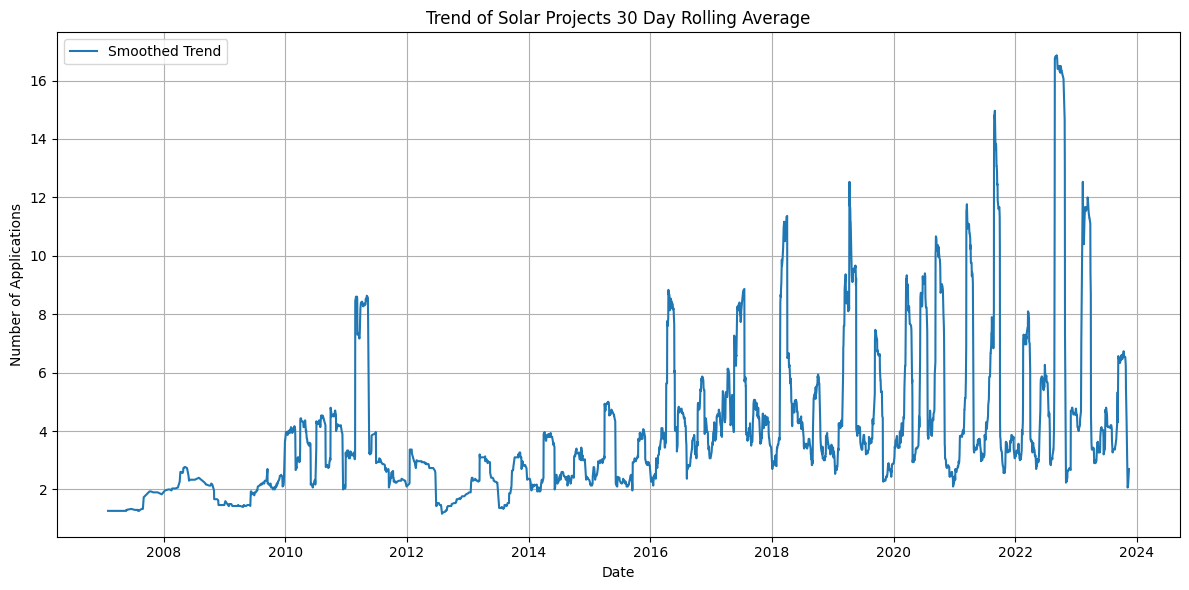

In [5]:
import matplotlib.pyplot as plt

renque['q_date'] = pd.to_datetime(renque['q_date'],  format='mixed', errors='coerce')

# Group by q_date and count the number of applications per date
daily_counts = renque.groupby('q_date').size().reset_index(name='application_count')

# Sort by q_date to ensure the trend is sequential
daily_counts = daily_counts.sort_values('q_date')

# Apply a rolling average to smooth the data (e.g., 30-day rolling average)
daily_counts['smoothed_count'] = daily_counts['application_count'].rolling(window=30, center=True).mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['q_date'], daily_counts['smoothed_count'], linestyle='-', label='Smoothed Trend')
plt.title('Trend of Solar Projects 30 Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/2972617490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque2020['year_month'] = renque2020['q_date'].dt.to_period('M')  # Convert to year-month format


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

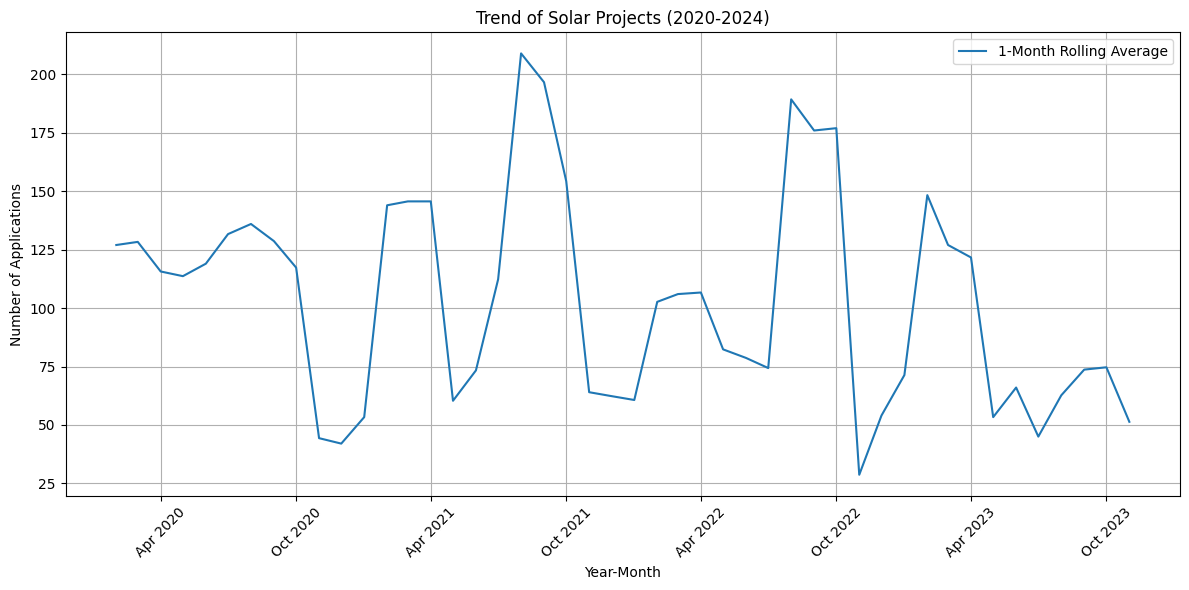

In [6]:

import pandas as pd


# Assuming 'renque' has a 'q_date' column in datetime format
renque2020 = renque[(renque['q_date'] >= '2020-01-01') & (renque['q_date'] <= '2024-12-31')]

# Extract year and month and group by these
renque2020['year_month'] = renque2020['q_date'].dt.to_period('M')  # Convert to year-month format
monthly_counts = renque2020.groupby('year_month').size().reset_index(name='application_count')

# Convert 'year_month' to datetime for plotting
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

# Apply a rolling average to smooth the data (e.g., 3-month rolling average)
monthly_counts['smoothed_count'] = monthly_counts['application_count'].rolling(window=3, center=True).mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['smoothed_count'], linestyle='-', label='1-Month Rolling Average')
plt.title('Trend of Solar Projects (2020-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.legend()

# Customize the x-axis to show only the months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))  # Show every 6 months

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt


In [7]:
# renque2020 = renque[(renque['q_date'] >= '2010-01-01') & (renque['q_date'] <= '2020-12-31')]

# # Group by q_date and count the number of applications per date
# daily_counts = renque2020.groupby('q_date').size().reset_index(name='application_count')

# # Sort by q_date to ensure the trend is sequential
# daily_counts = daily_counts.sort_values('q_date')

# # Apply a rolling average to smooth the data (e.g., 7-day rolling average)
# daily_counts['smoothed_count'] = daily_counts['application_count'].rolling(window=30, center=True).mean()

# # Plot the trend
# plt.figure(figsize=(12, 6))
# plt.plot(daily_counts['q_date'], daily_counts['smoothed_count'], linestyle='-', label='Smoothed Trend')
# plt.title('Trend of Solar and Wind Projects 30 Day Rolling Average (2010-2020)')
# plt.xlabel('Date')
# plt.ylabel('Number of Applications')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/2955752723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque2020['year_month'] = renque2020['q_date'].dt.to_period('M')  # Convert to year-month format


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

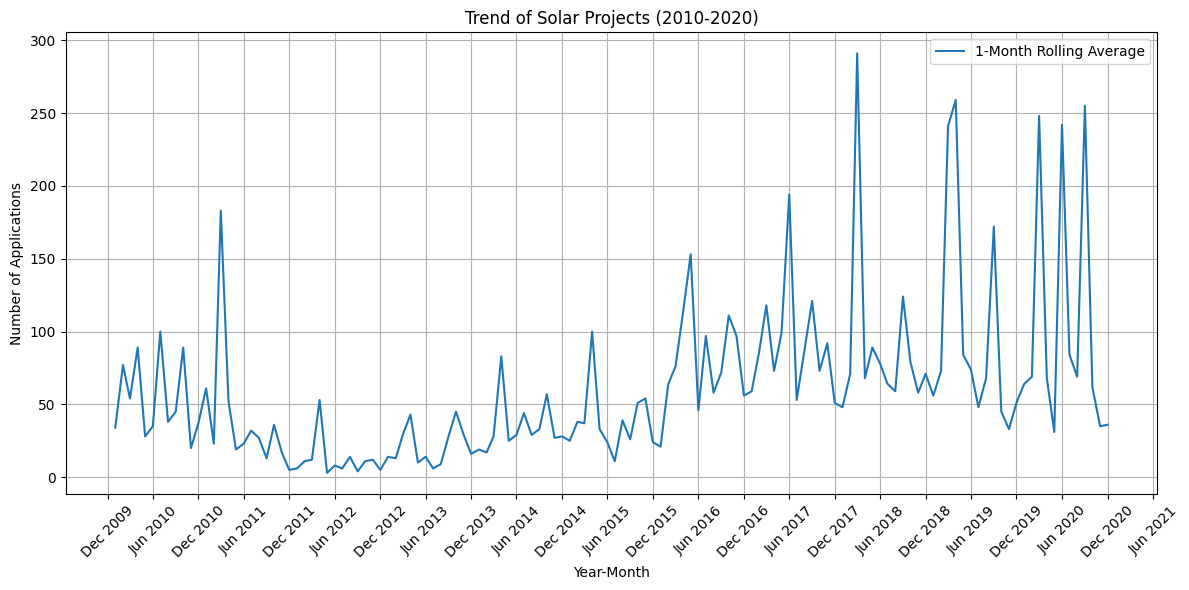

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'renque' has a 'q_date' column in datetime format
renque2020 = renque[(renque['q_date'] >= '2010-01-01') & (renque['q_date'] <= '2020-12-31')]

# Extract year and month and group by these
renque2020['year_month'] = renque2020['q_date'].dt.to_period('M')  # Convert to year-month format
monthly_counts = renque2020.groupby('year_month').size().reset_index(name='application_count')

# Convert 'year_month' to datetime for plotting
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

# Apply a rolling average to smooth the data (e.g., 3-month rolling average)
monthly_counts['smoothed_count'] = monthly_counts['application_count'].rolling(window=1, center=True).mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['smoothed_count'], linestyle='-', label='1-Month Rolling Average')
plt.title('Trend of Solar Projects (2010-2020)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.legend()

# Customize the x-axis to show only the months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))  # Show every 6 months

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt


## Local Elections

From the dataset provided by DeBenedictis Kessner, I got the data on *county legislature* elections. I then collapsed this data by state, county and year to see if an election occurred that year. This election dataset spans 2000 to 2020. It is the most comprehensive election dataset in the U.S. on local elections. For now I focused my analysis on county legislature as these are usually county commissioners or councilmemeber, who would have power over local zoning. 

The dataset also included *county executive* elections which I did not process but I could repeat the same analyses with it. Since each row is a county council member, I collapsed the date by state, county, year and month to see if there was an election in each county in a given month. I then also created a "member_change" column which is a binary variable equl to 1 if at least one of the council members was not an incumbent. 

In [9]:
## Local Elections

local_data = pd.read_csv("ledb_candidatelevel.csv")

In [10]:
local_data.head()

,ledb_candid,full_name,firstname,lastname,fips,geo_name,state_abb,office_consolidated,year,month,...,prob_female,prob_male,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,ballotpedia_url
0,59965,gil garcetti,gil,garcetti,06037,los angeles,CA,Prosecutor,1992,11.0,...,0.03,0.97,M,0.02,0.83,0.14,0.01,0.0,caucasian,NaN
1,59966,george gascon,george,gascon,06037,los angeles,CA,Prosecutor,2020,11.0,...,0.00,1.00,M,0.14,0.72,0.10,0.03,0.0,caucasian,NaN
2,59968,jackie lacey,jackie,lacey,06037,los angeles,CA,Prosecutor,2020,11.0,...,0.51,0.49,F,0.91,0.09,0.00,0.00,0.0,black,NaN
3,59968,jackie lacey,jackie,lacey,06037,los angeles,CA,Prosecutor,2012,11.0,...,0.51,0.49,F,0.91,0.09,0.00,0.00,0.0,black,NaN
4,7904,kim foxx,kim,foxx,17031,cook,IL,Prosecutor,2016,11.0,...,1.00,0.00,F,0.93,0.06,0.00,0.00,0.0,black,NaN


In [11]:
local = local_data.drop(columns=["contributor.cfscore",	"bonica.cid", "prob_other", "prob_female", 'prob_male', "gender_est", "prob_black", "prob_white", "prob_hispanic", "prob_asian", "race_est", "ballotpedia_url"])

In [12]:

countyleg = local[(local['office_consolidated'] == "County Legislature") & (local['winner'] == "win" ) ]

countyex = local[(local['office_consolidated'] == "County Legislature") & (local['winner'] == "win" ) ]
#& (local['winner'] == "win" )

In [13]:
countyleg.sort_values(by=["state_abb","geo_name", "year"]).head(36)

countyleg.to_csv("counylegex.csv")



In [14]:
# Checking if an election occurred 

import numpy as np

# Group by county, year, and month
collapsed = countyleg.groupby(["state_abb", 'geo_name', 'year', 'month']).agg(
    election=('year', lambda x: 1 if len(x) > 0 else 0),  # Check if there was an election
    member_change=('incumbent', lambda x: 1 if (x == 0).any() else (np.nan if x.isna().all() else 0)) 
).reset_index()


In [15]:
collapsed.head(20)

,state_abb,geo_name,year,month,election,member_change
0,AK,anchorage,2016,11.0,1,NaN
1,AL,baldwin,2000,11.0,1,NaN
2,AL,baldwin,2004,11.0,1,1.0
3,AL,baldwin,2006,11.0,1,1.0
4,AL,baldwin,2010,11.0,1,1.0
5,AL,baldwin,2014,11.0,1,1.0
6,AL,baldwin,2018,11.0,1,1.0
7,AL,calhoun,2018,11.0,1,NaN
8,AL,etowah,2016,11.0,1,NaN
9,AL,etowah,2018,11.0,1,NaN


## Matching Datasets 



In [16]:
# Extracting the year when the project entered the que

renque['q_date'] = pd.to_datetime(renque['q_date'],  format='mixed', errors='coerce')
renque['year'] = renque['q_date'].dt.year


que_elec = renque.merge(
    collapsed,
    how="left",
    left_on=['state', 'county_1', 'year'],
    right_on=['state_abb', 'geo_name', 'year']
)




/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/97472976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['q_date'] = pd.to_datetime(renque['q_date'],  format='mixed', errors='coerce')
/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/97472976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['year'] = renque['q_date'].dt.year


In [17]:
# Drop rows where 'year' is NaN
que_elec = que_elec[~que_elec['year'].isna()]
# Convert 'year' to integer
que_elec['year'] = que_elec['year'].astype(int)
# Filter out rows from 2021 onwards
que_elec = que_elec[que_elec['year'] < 2021]


In [18]:

pd.set_option('display.max_columns', None)  # Show all columns
que_elec.tail(30)




,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year,state_abb,geo_name,month,election,member_change
12244,395,withdrawn,2019-08-23,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,montgomery,NaN,NaN,TN,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Facility Study,Solar,Solar,NaN,NaN,154.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
12245,407,withdrawn,2019-10-23,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,coffee,NaN,NaN,TN,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Withdrawn,Solar,Solar,NaN,NaN,250.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
12246,378,active,2019-06-11,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,lowndes,NaN,NaN,MS,Southeast (non-ISO),NaN,Artesia 161-kV Substation (future),5/14/2023,2023.0,Under Construction,Construction,Solar,Solar,NaN,NaN,50.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
12247,338,withdrawn,2018-01-02,2018.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,lake,NaN,NaN,TN,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Withdrawn,Solar,Solar,NaN,NaN,68.0,NaN,NaN,2018,NaN,NaN,NaN,NaN,NaN
12248,345,withdrawn,2018-04-25,2018.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,shelby,NaN,NaN,TN,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,IA Executed,Solar,Solar,NaN,NaN,66.0,NaN,NaN,2018,TN,shelby,11.0,1.0,1.0
12249,423,active,2020-04-21,2020.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,clay,NaN,NaN,MS,Southeast (non-ISO),NaN,West Point 161-kV Substation,6/29/2023,2023.0,Interconnection Agreement,IA Executed,Solar,Solar,NaN,NaN,200.0,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN
12250,386,withdrawn,2019-08-01,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,colbert,NaN,NaN,AL,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Withdrawn,Solar,Solar,NaN,NaN,200.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
12251,393,withdrawn,2019-08-23,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,madison,NaN,NaN,TN,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Withdrawn,Solar,Solar,NaN,NaN,130.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN
12252,425,active,2020-04-23,2020.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,chickasaw,NaN,NaN,MS,Southeast (non-ISO),NaN,Clay - Okolona 161-kV TL,8/22/2024,2024.0,Facilities Study,Facility Study,Solar,Solar,NaN,NaN,150.0,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN
12253,382,withdrawn,2019-07-30,2019.0,NaN,NaN,NaN,TVA,NaN,NaN,NaN,lawrence,NaN,NaN,AL,Southeast (non-ISO),NaN,NaN,NaN,NaN,Archive,Facility Study,Solar,Solar,NaN,NaN,500.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN


In [19]:
## Saving to csv

que_elec.to_csv("que_elections.csv")

In [20]:
renque.shape[0]

12051

In [21]:
que_elec.shape[0]

8631

## Regressions


In [22]:
## Replacing NAs with 0 

que_elec['election'] = que_elec['election'].fillna(0)
que_elec['member_change'] = que_elec['member_change'].fillna(0)

# Drop observations from 2021 onwards as i do not have election data for those years 
# Ensure the 'year' column is of integer type
que_elec['year'] = que_elec['year'].astype(int)

# Filter out rows where the year is 2021 or later
que_elec_filtered = que_elec[que_elec['year'] < 2021]



que_elec.head(10)


,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year,state_abb,geo_name,month,election,member_change
0,GIA-73,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
2,GIA-82,withdrawn,2019-05-23,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,payne,NaN,NaN,OK,Southeast (non-ISO),Network,Valley 69 kV,9/1/2022,2022.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,99.0,NaN,NaN,2019,NaN,NaN,NaN,0.0,0.0
3,GIA-89,withdrawn,2020-01-23,2020.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,scott,NaN,NaN,MO,Southeast (non-ISO),Network,Morley 161 kV,12/1/2022,2022.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,80.0,NaN,NaN,2020,NaN,NaN,NaN,0.0,0.0
5,GIA-69,withdrawn,2018-05-31,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,kingfisher,NaN,NaN,OK,Southeast (non-ISO),Energy,Luther 138 kV,10/1/2020,2020.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,105.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
8,GIA-70,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
9,GIA-76,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
10,GIA-87,withdrawn,2019-10-25,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,clifton hill,NaN,NaN,MO,Southeast (non-ISO),Network,Thomas Hill 161 kV,6/1/2023,2023.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,160.0,NaN,NaN,2019,NaN,NaN,NaN,0.0,0.0
11,GIA-68,withdrawn,2018-05-24,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,jasper,NaN,NaN,MO,Southeast (non-ISO),Network,Blackberry 345 kV,9/1/2023,2023.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,200.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
12,GIA-62,withdrawn,2017-10-12,2017.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Energy,New Madrid Substation,12/31/2020,2020.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,202.0,NaN,NaN,2017,NaN,NaN,NaN,0.0,0.0
13,GIA-93,active,2020-11-10,2020.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,macon,NaN,NaN,MO,Southeast (non-ISO),Network,Palmyra 161 kV,6/1/2025,2025.0,GIA,IA Executed,Solar,Solar,NaN,NaN,100.0,NaN,NaN,2020,NaN,NaN,NaN,0.0,0.0


In [23]:


import statsmodels.api as sm
import statsmodels.formula.api as smf

aggregated = que_elec.groupby(['year', 'state', 'county_1']).agg(
    applications=('q_id', 'count'),  # Replace 'application_id' with the unique identifier for applications
    election=('election', 'max'),  # Max of election column ensures it's 1 if any election occurred in that year
    member_change=('member_change', 'max')  # Max of election column ensures it's 1 if any member change ocurred that year
).reset_index()

aggregated.head()

# Count the number of observations where election == 1 in the aggregated dataset

aggregated[aggregated['election'] == 1].shape[0]
aggregated[aggregated['member_change'] == 1].shape[0]


399

There are 598 county, year observation that have elections and from these 434 have at least one member change. 

In [24]:

# Convert state and year to categorical for fixed effects
aggregated['state'] = aggregated['state'].astype('category')
aggregated['year'] = aggregated['year'].astype('category')

# Poisson regression
formula = 'applications ~ election +member_change + C(state) + C(year) '  # Include state and year fixed effects
model = smf.poisson(formula=formula, data=aggregated).fit()

# Summary of results
print(model.summary())

Optimization terminated successfully.
         Current function value: 1.983382
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:           applications   No. Observations:                 3697
Model:                        Poisson   Df Residuals:                     3626
Method:                           MLE   Df Model:                           70
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.1245
Time:                        09:48:07   Log-Likelihood:                -7332.6
converged:                       True   LL-Null:                       -8375.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2559      1.011     -0.253      0.800      -2.238       1.726
C(state)[T.AR]

In [25]:
# OLS regression formula
formula = 'applications ~ election + C(state) + C(year) '


# Fit the OLS regression model
ols_model = smf.ols(formula=formula, data=aggregated).fit()

# Summary of results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           applications   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     8.049
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           1.15e-70
Time:                        09:48:07   Log-Likelihood:                -9591.9
No. Observations:                3697   AIC:                         1.932e+04
Df Residuals:                    3627   BIC:                         1.976e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5317      3.356     

In [26]:
# Negative Binomial regression
model = smf.negativebinomial(formula=formula, data=aggregated).fit()

# Summary of results
print(model.summary())

         Current function value: 1.793901
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     NegativeBinomial Regression Results                      
Dep. Variable:           applications   No. Observations:                 3697
Model:               NegativeBinomial   Df Residuals:                     3627
Method:                           MLE   Df Model:                           69
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                 0.07293
Time:                        09:48:08   Log-Likelihood:                -6632.1
converged:                      False   LL-Null:                       -7153.8
Covariance Type:            nonrobust   LLR p-value:                6.131e-174
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2611      1.126     -0.232      0.817      -

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### By Month and Year

In months leading up to the election 

Months after the election 

To do 

I need to count the days away from or months away from -- and then plot before or after the election 



In [27]:
## Observations with applications in election years 
que_elec_yr = renque.merge(
    collapsed,
    how="inner",
    left_on=['state', 'county_1', 'year'],
    right_on=['state_abb', 'geo_name', 'year']
)

que_elec_yr.shape[0]



1990

We can see that there are 2,284 applications that occurred in election years. 

In [28]:
# Ensure 'q_date' is a datetime object
que_elec_yr['q_date'] = pd.to_datetime(que_elec_yr['q_date'])

# Extract the application month
que_elec_yr['application_month'] = que_elec_yr['q_date'].dt.month

# Calculate the difference in months from the election month
que_elec_yr['months_from_election'] = que_elec_yr['application_month'] - que_elec_yr['month']

# Group by months_from_election and count applications
applications_by_month = que_elec_yr.groupby('months_from_election').size().reset_index(name='application_count')

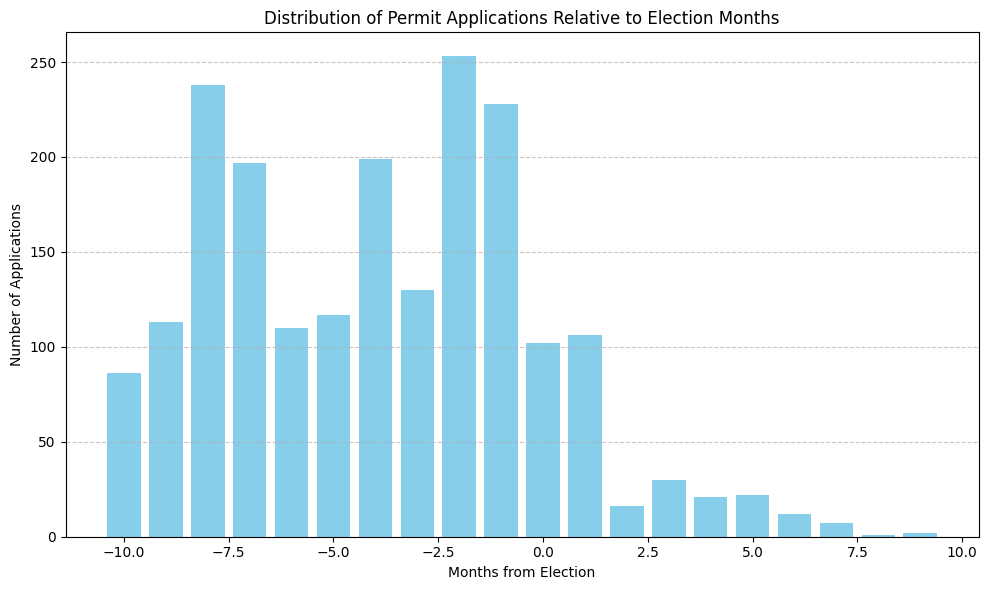

In [29]:
# Plot the distribution of applications by months from the election
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
que_elec_yr["month"].value_counts()

month
11.0    1541
6.0      362
3.0       43
4.0       11
5.0       10
1.0       10
7.0        3
8.0        3
2.0        3
12.0       2
10.0       2
Name: count, dtype: int64

Since a lot of the elections happen in november, to examine patterns in applications I cannot simply subset by election year but rather I need to look at months away from an election. 

In [31]:
# Create a datetime column for the election date
#collapsed['election_date'] = pd.to_datetime(collapsed[['year', 'month']].assign(day=1))

## Lagged and lead Months 
I am not just going to match in an election year. 

In [32]:
# Step 1: Extract unique state and county combinations
unique_state_county = collapsed[['state_abb', 'geo_name']].drop_duplicates().reset_index(drop=True)
unique_state_county.columns = ['state', 'county']

# Step 2: Create a base DataFrame with all combinations of years and months
years = range(2000, 2021)  # Years from 2000 to 2020
months = range(1, 13)  # Months from 1 to 12
base_data = [(year, month) for year in years for month in months]
base_df = pd.DataFrame(base_data, columns=['year', 'month'])

# Step 3: Perform a cross join to replicate year-month rows for each state-county pair
election_empty = unique_state_county.merge(base_df, how='cross')

# Step 4: Add empty columns for election-related information if needed
election_empty['election_months_away'] = None

# Display the resulting DataFrame
election_empty.shape[0]

146916

In [33]:

election_panel = election_empty.merge(
    collapsed,
    how="outer",
    left_on=['state', 'county', 'year', 'month'],
    right_on=['state_abb', 'geo_name', 'year', 'month']
)



In [34]:
# Ensure 'month' in collapsed is an integer
collapsed['month'] = collapsed['month'].astype(int)

# Create the 'election_date' column in collapsed
collapsed['election_date'] = pd.to_datetime(
    collapsed['year'].astype(str) + '-' + collapsed['month'].astype(str) + '-01'
)

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year, election_month):
    return (application_year - election_year) * 12 + (application_month - election_month)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year = county_data['year']
    election_month = county_data['month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year, election_month),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']


In [35]:
election_panel.to_csv("election_panel.csv")

#election_panel.shape[0]

In [36]:
# test = election_panel.loc[0:500].copy()
# new_collapsed = collapsed.loc[0:3,]
# for _, county_data in new_collapsed.iterrows():
#     state = county_data['state_abb']
#     county = county_data['geo_name']
#     election_year = county_data['year']
#     election_month = int(county_data['month'])
#     print(f"Election Year: {election_year}, Election Month: {election_month}")

#     # Filter election_panel for the current state and county
#     mask = (test['state'] == state) & (test['county'] == county)

#     # Calculate months away for the specified range
#     test.loc[mask, 'election_months_away'] = test.loc[mask].apply(
#         lambda row: calculate_months_away(row, election_year, election_month) 
#         if -6 <= calculate_months_away(row, election_year, election_month) <= 6 else None, 
#         axis=1
#     )

#     print(test.loc[mask].apply(lambda x:calculate_months_away(x,election_year, election_month),axis=1))

In [37]:
# test.loc[252:280]


In [38]:

# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month.head()


/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/3678151964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['q_month'] = renque['q_date'].dt.month


,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year,q_month,county,month,election_months_away,state_abb,geo_name,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,san juan,NaN,NaN,NM,West (non-ISO),Network & Energy Resource Interconnection\nSer...,Four Corners 230kV\nsubstation,NaN,NaN,Withdrawn,Feasibility Study,Solar,Solar,NaN,NaN,50.0,NaN,NaN,2011.0,1.0,san juan,1.0,2.0,NaN,NaN,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yavapai,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Chino Valley 12 kV,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,15.0,NaN,NaN,2011.0,10.0,yavapai,10.0,None,NaN,NaN,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,4.0,maricopa,4.0,None,NaN,NaN,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,3.0,None,NaN,NaN,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Bunyan -\nPaloma 69 kV Line,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,3.0,None,NaN,NaN,NaN,NaN


In [39]:
#renque.loc[renque["q_id"]=="88",]

In [40]:
#que_elec_month.loc[que_elec_month["county"]=="maricopa",]

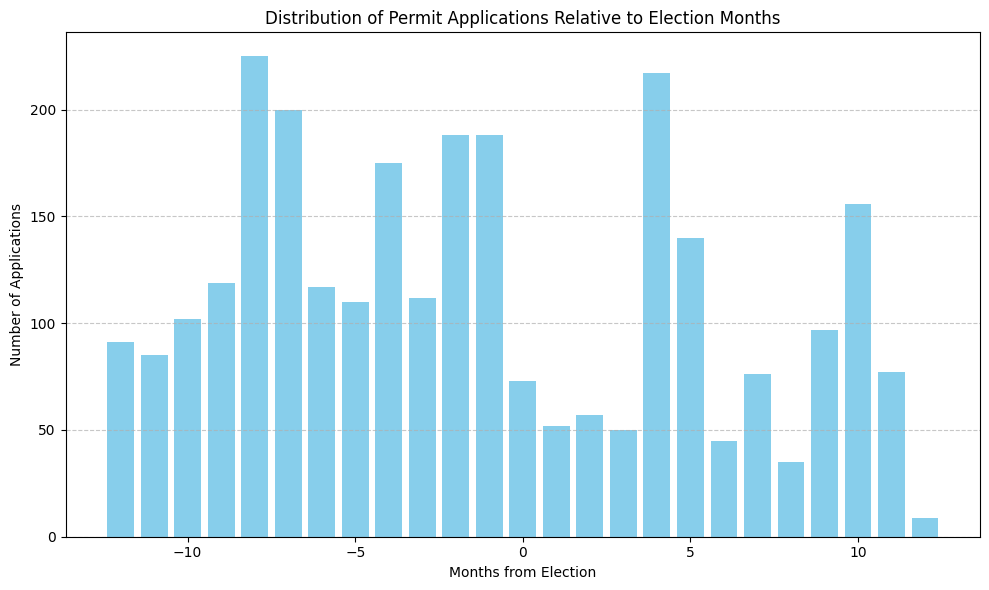

In [41]:
# Calculate applications by months from the election
applications_by_month = que_elec_month['election_months_away'].value_counts().reset_index()
applications_by_month.columns = ['months_from_election', 'application_count']
applications_by_month = applications_by_month.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
applications_by_month.head()

,months_from_election,application_count
14,-12.0,91
15,-11.0,85
12,-10.0,102
8,-9.0,119
0,-8.0,225


## Removing Presidential Elections 

Since some local elections may occur at the same time as presidential elections I excluded those from my analysis below. 

In [43]:
# Define the presidential election years and the month to exclude
presidential_years = [2000, 2004, 2008, 2016, 2020]
excluded_month = 11.0  # Ensure month matches the format in your DataFrame

# Filter out rows corresponding to January in presidential years
election_no_pres = election_panel[
    ~((election_panel['year'].isin(presidential_years)) & (election_panel['month'] == excluded_month))
]



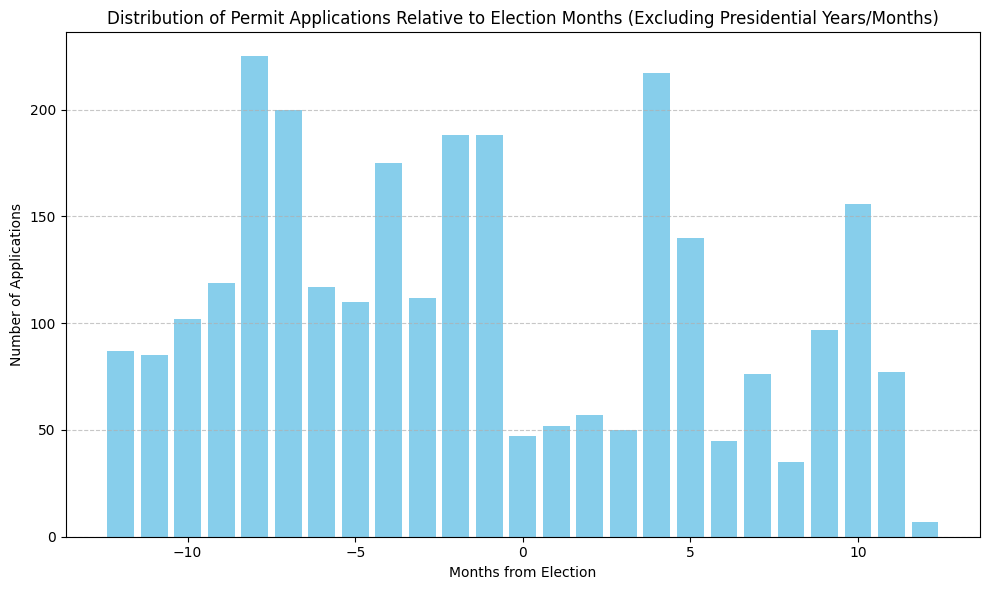

In [44]:
# Define presidential election years and months to exclude
presidential_years = [2000, 2004, 2008, 2016, 2020]
presidential_months = [11]  # Typically November

# Remove observations in presidential election years and months
filtered_que_elec_month = que_elec_month[
    ~((que_elec_month['q_year'].isin(presidential_years)) & (que_elec_month['q_month'].isin(presidential_months)))
]

# Calculate applications by months from the election
applications_by_month = filtered_que_elec_month['election_months_away'].value_counts().reset_index()
applications_by_month.columns = ['months_from_election', 'application_count']
applications_by_month = applications_by_month.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months (Excluding Presidential Years/Months)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
 

In [45]:
## Replacing NAs with 0 

que_elec['election'] = que_elec['election'].fillna(0)
que_elec['member_change'] = que_elec['member_change'].fillna(0)

# Drop observations from 2021 onwards as i do not have election data for those years 
# Exclude presidential election years (2000, 2004, 2008, 2016, 2020)
presidential_years = [2000.0, 2004.0, 2008.0, 2016.0, 2020.0]

# Ensure the 'year' column is of integer type
que_elec['year'] = que_elec['year'].astype(int)

# Filter out rows where the year is 2021 or later or a presidential election year
que_elec_filtered = que_elec[(que_elec['year'] < 2021) & (~que_elec['q_year'].isin(presidential_years))]

que_elec_filtered.head(10)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year,state_abb,geo_name,month,election,member_change
0,GIA-73,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
2,GIA-82,withdrawn,2019-05-23,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,payne,NaN,NaN,OK,Southeast (non-ISO),Network,Valley 69 kV,9/1/2022,2022.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,99.0,NaN,NaN,2019,NaN,NaN,NaN,0.0,0.0
5,GIA-69,withdrawn,2018-05-31,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,kingfisher,NaN,NaN,OK,Southeast (non-ISO),Energy,Luther 138 kV,10/1/2020,2020.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,105.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
8,GIA-70,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
9,GIA-76,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
10,GIA-87,withdrawn,2019-10-25,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,clifton hill,NaN,NaN,MO,Southeast (non-ISO),Network,Thomas Hill 161 kV,6/1/2023,2023.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,160.0,NaN,NaN,2019,NaN,NaN,NaN,0.0,0.0
11,GIA-68,withdrawn,2018-05-24,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,jasper,NaN,NaN,MO,Southeast (non-ISO),Network,Blackberry 345 kV,9/1/2023,2023.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,200.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
12,GIA-62,withdrawn,2017-10-12,2017.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Energy,New Madrid Substation,12/31/2020,2020.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,202.0,NaN,NaN,2017,NaN,NaN,NaN,0.0,0.0
15,GIA-74,withdrawn,2018-12-06,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Energy,New Madrid to Essex 345 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018,NaN,NaN,NaN,0.0,0.0
17,GIA-86,active,2019-10-25,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,clifton hill,NaN,NaN,MO,Southeast (non-ISO),Network,Thomas Hill 69 kV,3/31/2024,2024.0,GIA,IA Executed,Solar,Solar,NaN,NaN,100.0,NaN,NaN,2019,NaN,NaN,NaN,0.0,0.0


In [46]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

aggregated = que_elec_filtered.groupby(['year', 'state', 'county_1']).agg(
    applications=('q_id', 'count'),  # Replace 'application_id' with the unique identifier for applications
    election=('election', 'max'),  # Max of election column ensures it's 1 if any election occurred in that year
    member_change = ('member_change', 'max')  # Max of election column ensures it's 1 if any member change ocurred that year
).reset_index()

aggregated[aggregated['election'] == 1].shape[0]
aggregated[aggregated['member_change'] == 1].shape[0]

252

In [47]:
# Convert state and year to categorical for fixed effects
aggregated['state'] = aggregated['state'].astype('category')
aggregated['year'] = aggregated['year'].astype('category')

# Poisson regression
formula = 'applications ~ election +member_change + C(state) + C(year) '  # Include state and year fixed effects
model = smf.poisson(formula=formula, data=aggregated).fit()

# Summary of results
print(model.summary())

Optimization terminated successfully.
         Current function value: 2.039221
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:           applications   No. Observations:                 2609
Model:                        Poisson   Df Residuals:                     2542
Method:                           MLE   Df Model:                           66
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.1419
Time:                        09:51:04   Log-Likelihood:                -5320.3
converged:                       True   LL-Null:                       -6199.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8070      1.008     -0.800      0.424      -2.783       1.169
C(state)[T.AR]

## Lagging Elections 



In [48]:
collapsed.head(10)

,state_abb,geo_name,year,month,election,member_change,election_date
0,AK,anchorage,2016,11,1,NaN,2016-11-01
1,AL,baldwin,2000,11,1,NaN,2000-11-01
2,AL,baldwin,2004,11,1,1.0,2004-11-01
3,AL,baldwin,2006,11,1,1.0,2006-11-01
4,AL,baldwin,2010,11,1,1.0,2010-11-01
5,AL,baldwin,2014,11,1,1.0,2014-11-01
6,AL,baldwin,2018,11,1,1.0,2018-11-01
7,AL,calhoun,2018,11,1,NaN,2018-11-01
8,AL,etowah,2016,11,1,NaN,2016-11-01
9,AL,etowah,2018,11,1,NaN,2018-11-01


In [49]:


# Create a lagged election year for analysis
collapsed['lagged_election_year'] = collapsed['year'] + 1
collapsed['lagged_election_month'] = collapsed['month']


collapsed_lagged = collapsed.drop(columns=["year","month"])
collapsed_lagged.head(10)

,state_abb,geo_name,election,member_change,election_date,lagged_election_year,lagged_election_month
0,AK,anchorage,1,NaN,2016-11-01,2017,11
1,AL,baldwin,1,NaN,2000-11-01,2001,11
2,AL,baldwin,1,1.0,2004-11-01,2005,11
3,AL,baldwin,1,1.0,2006-11-01,2007,11
4,AL,baldwin,1,1.0,2010-11-01,2011,11
5,AL,baldwin,1,1.0,2014-11-01,2015,11
6,AL,baldwin,1,1.0,2018-11-01,2019,11
7,AL,calhoun,1,NaN,2018-11-01,2019,11
8,AL,etowah,1,NaN,2016-11-01,2017,11
9,AL,etowah,1,NaN,2018-11-01,2019,11


In [50]:
# # Ensure 'month' in collapsed is an integer
# collapsed['month'] = collapsed['month'].astype(int)

# # Create the 'election_date' column in collapsed
# collapsed['election_date'] = pd.to_datetime(
#     collapsed['lagged_election_year'].astype(str) + '-' + collapsed['lagged_election_month'].astype(str) + '-01'
# )
# collapsed.head(10)

In [51]:


# Create the 'election_date' column in collapsed
#collapsed_lagged['election_date'] = pd.to_datetime(
#    collapsed_lagged['lagged_election_year'].astype(str) + '-' + collapsed_lagged['lagged_election_month'].astype(str) + '-01'
#)

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year_lag, election_month_lag):
    return (application_year - election_year_lag) * 12 + (application_month - election_month_lag)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed_lagged.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year_lag = county_data['lagged_election_year']
    election_month_lag = county_data['lagged_election_month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year_lag, election_month_lag) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year_lag, election_month_lag) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year_lag, election_month_lag),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']

In [52]:
renque.head(20)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year,q_month
4,GIA-73,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018.0,11.0
6,GIA-97,withdrawn,2022-01-07,2022.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid - Essex 345kV,10/31/2024,2024.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,350.0,NaN,NaN,2022.0,1.0
9,GIA-82,withdrawn,2019-05-23,2019.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,payne,NaN,NaN,OK,Southeast (non-ISO),Network,Valley 69 kV,9/1/2022,2022.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,99.0,NaN,NaN,2019.0,5.0
14,GIA-89,withdrawn,2020-01-23,2020.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,scott,NaN,NaN,MO,Southeast (non-ISO),Network,Morley 161 kV,12/1/2022,2022.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,80.0,NaN,NaN,2020.0,1.0
15,GIA-106,active,2022-08-16,2022.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid - Essex 345kV,10/31/2024,2024.0,FS,Facilities Study,Solar,Solar,NaN,NaN,350.0,NaN,NaN,2022.0,8.0
17,GIA-69,withdrawn,2018-05-31,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,kingfisher,NaN,NaN,OK,Southeast (non-ISO),Energy,Luther 138 kV,10/1/2020,2020.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,105.0,NaN,NaN,2018.0,5.0
20,GIA-107,active,2022-08-16,2022.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,new madrid,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid - St Francis 345kV,10/31/2024,2024.0,FS,Facilities Study,Solar,Solar,NaN,NaN,250.0,NaN,NaN,2022.0,8.0
26,GIA-108,active,2022-08-30,2022.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,craig,NaN,NaN,OK,Southeast (non-ISO),Network,Sportsman-Blackberry 345 kV line,12/31/2025,2025.0,FS,Facilities Study,Solar,Solar,NaN,NaN,250.0,NaN,NaN,2022.0,8.0
28,GIA-70,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018.0,11.0
29,GIA-76,withdrawn,2018-11-19,2018.0,NaN,NaN,NaN,AEC,NaN,NaN,NaN,pemiscot,NaN,NaN,MO,Southeast (non-ISO),Network,New Madrid to Dell 500 kV,10/1/2021,2021.0,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2018.0,11.0


In [53]:
# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'q_year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month.head(20)


/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/3530482373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['q_month'] = renque['q_date'].dt.month


,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year_x,q_month,county,year_y,month,election_months_away,state_abb,geo_name,election,member_change
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,san juan,NaN,NaN,NM,West (non-ISO),Network & Energy Resource Interconnection\nSer...,Four Corners 230kV\nsubstation,NaN,NaN,Withdrawn,Feasibility Study,Solar,Solar,NaN,NaN,50.0,NaN,NaN,2011.0,1.0,san juan,2011,1.0,-10.0,NaN,NaN,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yavapai,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Chino Valley 12 kV,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,15.0,NaN,NaN,2011.0,10.0,yavapai,2011,10.0,None,NaN,NaN,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,4.0,maricopa,2010,4.0,5.0,NaN,NaN,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Bunyan -\nPaloma 69 kV Line,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
5,Q111,withdrawn,2010-03-22,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection Service,Saddle\nMountain 69 kV Substation,NaN,NaN,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,30.0,NaN,NaN,2010.0,3.0,maricopa,2010,3.0,4.0,NaN,NaN,NaN,NaN
6,Q184,withdrawn,2010-12-23,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy and Network Resource Interconnection\nS...,Delaney 500 kV Substation,3/1/2017,2017.0,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2010.0,12.0,maricopa,2010,12.0,None,NaN,NaN,NaN,NaN
7,Q186,withdrawn,2011-01-27,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yuma,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Baja Substation\n12kV,2/5/2016,2016.0,Withdrawn,Facility Study,Solar,Solar,NaN,NaN,16.0,NaN,NaN,2011.0,1.0,yuma,2011,1.0,None,NaN,NaN,NaN,NaN
8,Q93,withdrawn,2010-01-21,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Baseline 12 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,1.0,maricopa,2010,1.0,2.0,NaN,NaN,NaN,NaN
9,Q60,withdrawn,2008-12-31,2008.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yuma,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection Service,Hassayampa HooDoo Wash 500 kV Line,11/1/2013,2013.0,Withdrawn,Facility Study,Solar,Solar,NaN,NaN,40.0,NaN,NaN,2008.0,12.0,yuma,2008,12.0,-11.0,NaN,NaN,NaN,NaN


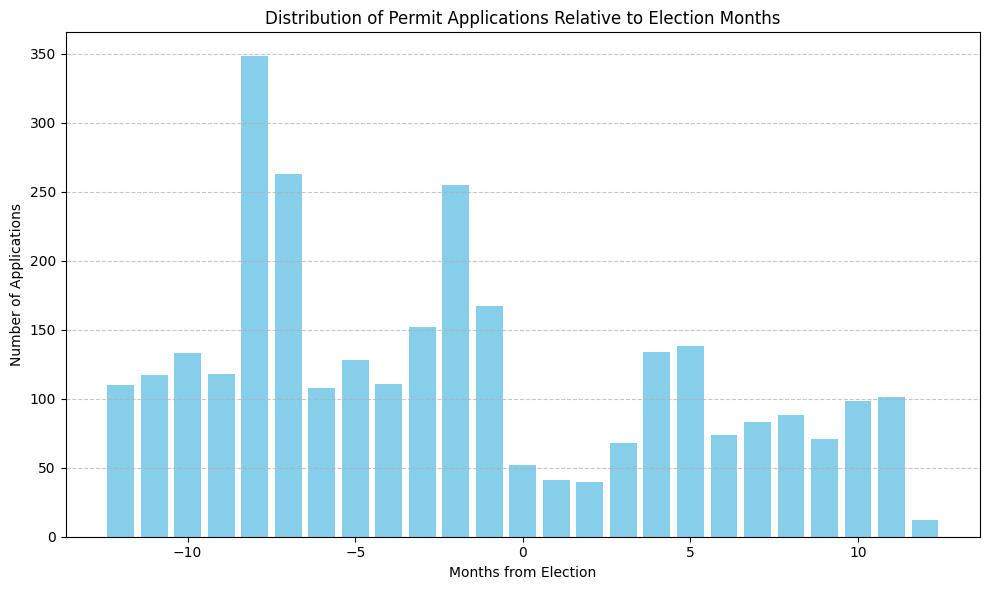

In [54]:
# Calculate applications by months from the election
applications_by_month = que_elec_month['election_months_away'].value_counts().reset_index()
applications_by_month.columns = ['months_from_election', 'application_count']
applications_by_month = applications_by_month.sort_values('months_from_election')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['months_from_election'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I have to fix this code later, but the issue was that I need to recreaste the eleciton_panel first 
I am doing the year before by subtracting 

In [55]:
collapsed['year'] = collapsed['year'].astype(int)+1
collapsed.head(10)

,state_abb,geo_name,year,month,election,member_change,election_date,lagged_election_year,lagged_election_month
0,AK,anchorage,2017,11,1,NaN,2016-11-01,2017,11
1,AL,baldwin,2001,11,1,NaN,2000-11-01,2001,11
2,AL,baldwin,2005,11,1,1.0,2004-11-01,2005,11
3,AL,baldwin,2007,11,1,1.0,2006-11-01,2007,11
4,AL,baldwin,2011,11,1,1.0,2010-11-01,2011,11
5,AL,baldwin,2015,11,1,1.0,2014-11-01,2015,11
6,AL,baldwin,2019,11,1,1.0,2018-11-01,2019,11
7,AL,calhoun,2019,11,1,NaN,2018-11-01,2019,11
8,AL,etowah,2017,11,1,NaN,2016-11-01,2017,11
9,AL,etowah,2019,11,1,NaN,2018-11-01,2019,11


In [56]:


election_panel = election_empty.merge(
    collapsed,
    how="outer",
    left_on=['state', 'county', 'year', 'month'],
    right_on=['state_abb', 'geo_name', 'year', 'month']
)

#election_panel.to_csv("text.csv")#

In [57]:
# Ensure 'month' in collapsed is an integer
collapsed['month'] = collapsed['month'].astype(int)

# Create the 'election_date' column in collapsed
collapsed['election_date'] = pd.to_datetime(
    collapsed['year'].astype(str) + '-' + collapsed['month'].astype(str) + '-01'
)

#collapsed = collapsed[collapsed['state_abb'].isin(['AK', 'AL'])]

# Function to calculate months away
def calculate_months_away(application_year, application_month, election_year, election_month):
    return (application_year - election_year) * 12 + (application_month - election_month)

# Iterate over each unique state-county pair in collapsed
for _, county_data in collapsed.iterrows():
    state = county_data['state_abb']
    county = county_data['geo_name']
    election_year = county_data['year']
    election_month = county_data['month']

    # Filter rows in election_panel for the current state and county
    subset = election_panel[(election_panel['state'] == state) & (election_panel['county'] == county)]

    # Further filter to rows within ±12 months of the election date
    subset = subset[
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) >= -12) &
        (calculate_months_away(subset['year'], subset['month'], election_year, election_month) <= 12)
    ]

    # Calculate months away for the filtered subset
    subset['temp_months_away'] = subset.apply(
        lambda row: calculate_months_away(row['year'], row['month'], election_year, election_month),
        axis=1
    )

    # Update the main election_panel with the calculated months away
    election_panel.loc[subset.index, 'election_months_away'] = subset['temp_months_away']

In [58]:
collapsed.tail()

,state_abb,geo_name,year,month,election,member_change,election_date,lagged_election_year,lagged_election_month
6053,WV,kanawha,2013,11,1,NaN,2013-11-01,2013,11
6054,WV,kanawha,2015,11,1,NaN,2015-11-01,2015,11
6055,WV,kanawha,2021,11,1,1.0,2021-11-01,2021,11
6056,WV,monongalia,2013,11,1,NaN,2013-11-01,2013,11
6057,WV,monongalia,2015,11,1,NaN,2015-11-01,2015,11


In [59]:
election_panel.to_csv("election_panel_lagged.csv")

#collapsed.head(10)

In [60]:
# Extract the application month
renque['q_month'] = renque['q_date'].dt.month

que_elec_month = renque.merge(
    election_panel,
    how="inner",
    left_on=['state', 'county_1', 'q_year', 'q_month'],
    right_on=['state', 'county', 'year', 'month']
)

que_elec_month.head(50)

/var/folders/0s/j1w1qvn51_57mr5qvxtf89_40000gn/T/ipykernel_20051/3176567667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renque['q_month'] = renque['q_date'].dt.month


,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,IA_status_raw,IA_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3,year_x,q_month,county,year_y,month,election_months_away,state_abb,geo_name,election,member_change,election_date,lagged_election_year,lagged_election_month
0,Q181,withdrawn,2011-01-11,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,san juan,NaN,NaN,NM,West (non-ISO),Network & Energy Resource Interconnection\nSer...,Four Corners 230kV\nsubstation,NaN,NaN,Withdrawn,Feasibility Study,Solar,Solar,NaN,NaN,50.0,NaN,NaN,2011.0,1.0,san juan,2011,1,-10,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,Q210,withdrawn,2011-10-26,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yavapai,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Chino Valley 12 kV,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,15.0,NaN,NaN,2011.0,10.0,yavapai,2011,10,None,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,Q125,withdrawn,2010-04-01,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,4.0,maricopa,2010,4,5,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,Q124,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Arlington 69 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,2010,3,4,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,Q118,withdrawn,2010-03-31,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource\nInterconnection Service,Bunyan -\nPaloma 69 kV Line,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,3.0,maricopa,2010,3,4,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5,Q111,withdrawn,2010-03-22,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection Service,Saddle\nMountain 69 kV Substation,NaN,NaN,Withdrawn,Withdrawn,Solar,Solar,NaN,NaN,30.0,NaN,NaN,2010.0,3.0,maricopa,2010,3,4,NaN,NaN,NaN,NaN,NaT,NaN,NaN
6,Q184,withdrawn,2010-12-23,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy and Network Resource Interconnection\nS...,Delaney 500 kV Substation,3/1/2017,2017.0,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,300.0,NaN,NaN,2010.0,12.0,maricopa,2010,12,None,NaN,NaN,NaN,NaN,NaT,NaN,NaN
7,Q186,withdrawn,2011-01-27,2011.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yuma,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Baja Substation\n12kV,2/5/2016,2016.0,Withdrawn,Facility Study,Solar,Solar,NaN,NaN,16.0,NaN,NaN,2011.0,1.0,yuma,2011,1,None,NaN,NaN,NaN,NaN,NaT,NaN,NaN
8,Q93,withdrawn,2010-01-21,2010.0,NaN,NaN,NaN,APS,NaN,NaN,APS,maricopa,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection\nService,Baseline 12 kV\nSubstation,NaN,NaN,Withdrawn,System Impact Study,Solar,Solar,NaN,NaN,20.0,NaN,NaN,2010.0,1.0,maricopa,2010,1,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN
9,Q60,withdrawn,2008-12-31,2008.0,NaN,NaN,NaN,APS,NaN,NaN,APS,yuma,NaN,NaN,AZ,West (non-ISO),Energy Resource Interconnection Service,Hassayampa HooDoo Wash 500 kV Line,11/1/2013,2013.0,Withdrawn,Facility Study,Solar,Solar,NaN,NaN,40.0,NaN,NaN,2008.0,12.0,yuma,2008,12,-11,NaN,NaN,NaN,NaN,NaT,NaN,NaN


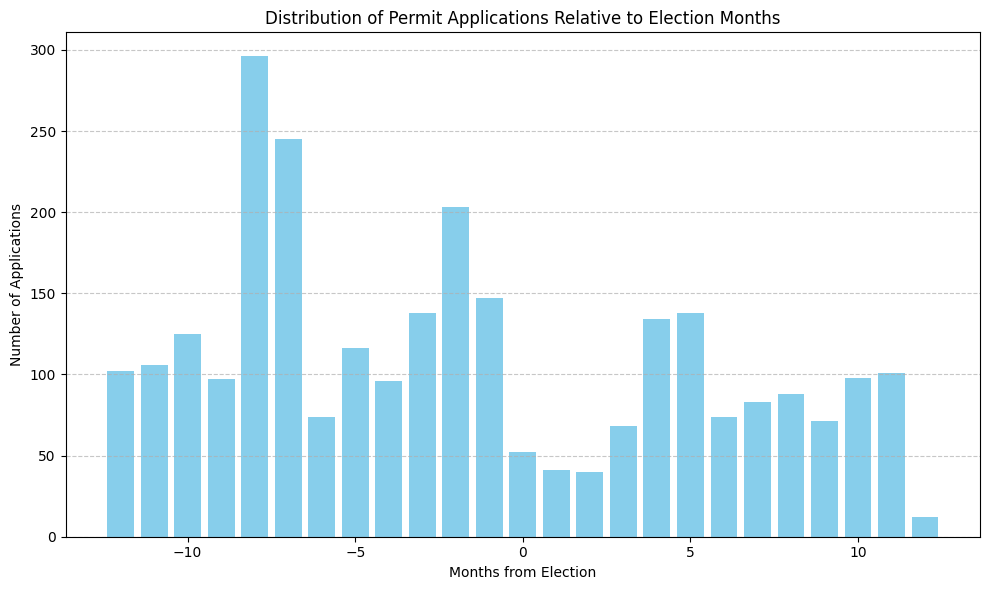

In [61]:
# Group by 'election_months_away' and count applications
applications_by_month = que_elec_month.groupby('election_months_away').size().reset_index(name='application_count')
applications_by_month.columns = ['election_months_away', 'application_count']
applications_by_month = applications_by_month.sort_values('election_months_away')

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(applications_by_month['election_months_away'], applications_by_month['application_count'], color='skyblue')
plt.xlabel('Months from Election')
plt.ylabel('Number of Applications')
plt.title('Distribution of Permit Applications Relative to Election Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
que_elec_month["election_months_away"].value_counts()

election_months_away
-8     296
-7     245
-2     203
-1     147
5      138
-3     138
4      134
-10    125
-5     116
-11    106
-12    102
11     101
10      98
-9      97
-4      96
8       88
7       83
6       74
-6      74
9       71
3       68
0       52
1       41
2       40
12      12
Name: count, dtype: int64